<a href="https://colab.research.google.com/github/MRS028/AI-ML-Assignments/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email Address: **skrifat483@gmail.com**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv('final-employee-ds.csv')
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


Q1.Load the TrainingHours column into a NumPy array.
Convert to float datatype


Find mean & standard deviation

Final output: Two numeric values


In [ ]:
training_hours = df['TrainingHours'].to_numpy()
training_hours = training_hours.astype(float)

mean = np.mean(training_hours)
std = np.std(training_hours)

print(f"{mean:.2f},{std:.2f}")


24.19,13.84


Question : 2


Handle missing values (if any):
Fill missing Salary with department-wise median


Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

Final output: One numeric value





In [ ]:
df['Salary'] = df.groupby('Department')['Salary'].transform(
    lambda x: x.fillna(x.median())
)

total_salary = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]['Salary'].sum()

print(f"{total_salary:.2f}")


1985775.50


Question : 3



Filter employees who:
Department = "IT" or "Finance"


Age between 30–45


PerformanceScore > 88


Sort by Salary descending

Final output: Table with Name, Department, Salary, PerformanceScore



In [ ]:
filtered_employees = df[
    (df['Department'].isin(['IT', 'Finance'])) &
    (df['Age'].between(30, 45)) &
    (df['PerformanceScore'] > 88)
].sort_values('Salary', ascending=False)[['Name', 'Department', 'Salary', 'PerformanceScore']]

print(filtered_employees.to_string(index=False))

       Name Department   Salary  PerformanceScore
Employee_95         IT 140386.0                94
Employee_89    Finance 126027.0                92
 Employee_5    Finance  85543.0                97
Employee_33         IT  83919.0                98
Employee_56    Finance  49540.0                94


Question : 4


Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)
Filter top 5 employees by SalaryPerHour

Final output: Table(5 Rows) with Name, SalaryPerHour



In [ ]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)

top_5 = df.nlargest(5, 'SalaryPerHour')[['Name', 'SalaryPerHour']]

print(top_5.to_string(index=False))

       Name  SalaryPerHour
Employee_47     981.278571
Employee_28     971.292857
Employee_32     967.392857
Employee_80     945.335526
Employee_81     937.858974


Question : 5


Create a bar chart showing the count of employees in each Department, separated by Gender. You can solve the question with any of the package (Matplotlib , Seaborn , Plotly )
Dataset Columns Used:
Department → Categorical variable (IT, Finance, HR, Marketing, Management)


Gender → Categorical variable (Male, Female)

Expected Output
A bar chart where:


x-axis → Department


y-axis → Number of employees


Each bar split into Male and Female segments


Colors differentiate gender


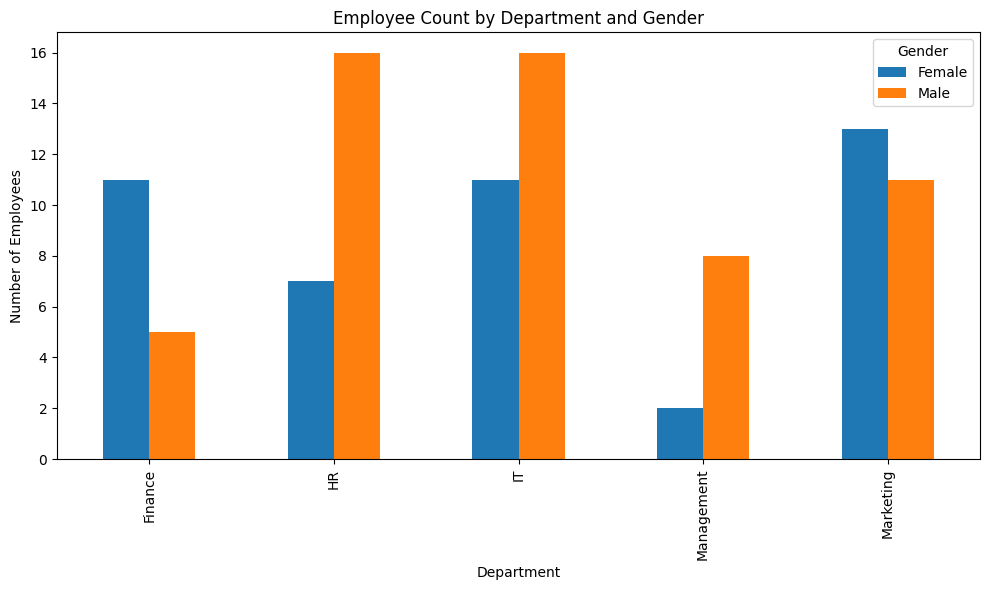

In [ ]:
dept_gender_counts = df.groupby(['Department', 'Gender']).size().unstack()
ax = dept_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Employee Count by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()